In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('student-dataset.csv')
df.drop(columns=['latitude', 'longitude', 'portfolio.rating', 'coverletter.rating', 'refletter.rating', 'ethnic.group'], inplace=True)
df.drop(df.columns[0], axis=1).describe()

,age,english.grade,math.grade,sciences.grade,language.grade
count,307.000000,307.000000,307.000000,307.000000,307.000000
mean,21.964169,3.369707,3.414332,3.446580,4.396417
std,1.248013,0.538724,0.476839,0.509081,0.996474
min,19.000000,1.500000,2.100000,1.400000,1.000000
25%,21.000000,3.100000,3.100000,3.200000,4.000000
50%,22.000000,3.500000,3.500000,3.600000,5.000000
75%,23.000000,3.800000,3.800000,3.800000,5.000000
max,26.000000,4.000000,4.000000,4.000000,5.000000


There is a significantly larger standard deviation in the Language grade, indicating that students perform inconsitently as a whole.

Students are achieving the highest grades in their Language classes, followed by Science, then lastly Math and English.

In [86]:
df.head(3)

,id,name,nationality,city,gender,age,english.grade,math.grade,sciences.grade,language.grade
0,0,Kiana Lor,China,Suzhou,F,22,3.5,3.7,3.1,1.0
1,1,Joshua Lonaker,United States of America,Santa Clarita,M,22,2.9,3.2,3.6,5.0
2,2,Dakota Blanco,United States of America,Oakland,F,22,3.9,3.8,3.2,5.0


We are provided information on student nationality, gender, and age which will be useful when making predictions based on demographics.

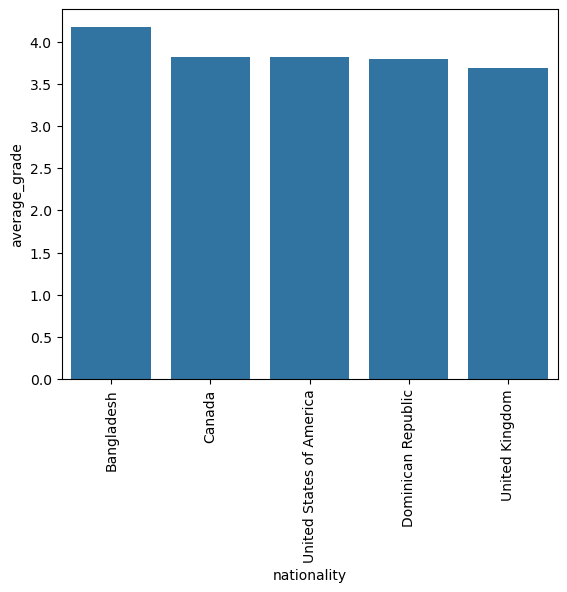

In [87]:
df['average_grade'] = df[['english.grade', 'math.grade', 'sciences.grade', 'language.grade']].mean(axis=1)
national_average_grade = df.groupby('nationality')['average_grade'].mean().reset_index()
top_nationalities = national_average_grade.sort_values(by='average_grade', ascending=False).head(5)

sns.barplot(data=top_nationalities, x='nationality', y='average_grade')
plt.xticks(rotation=90)
plt.show()

The above bar plot visualises the top 5 nationalities with the highest average grade.

Bangladesh has an average grade across subjects of 4.1, higher than any other nationality in the dataset.

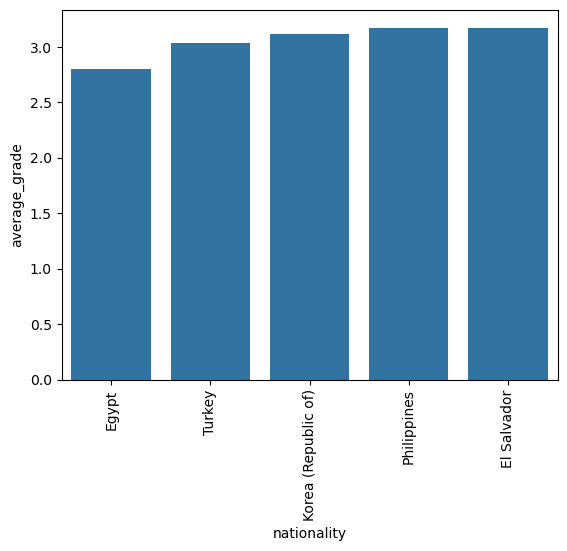

In [88]:
top_nationalities = national_average_grade.sort_values(by='average_grade', ascending=True).head(5)

sns.barplot(data=top_nationalities, x='nationality', y='average_grade')
plt.xticks(rotation=90)
plt.show()

Contrarily, the above bar plot visualises the bottom 5 nationalities with the lowest average grade.

Egypt has an average grade across subjects of 2.7, the lowest of all nationalities in the dataset.

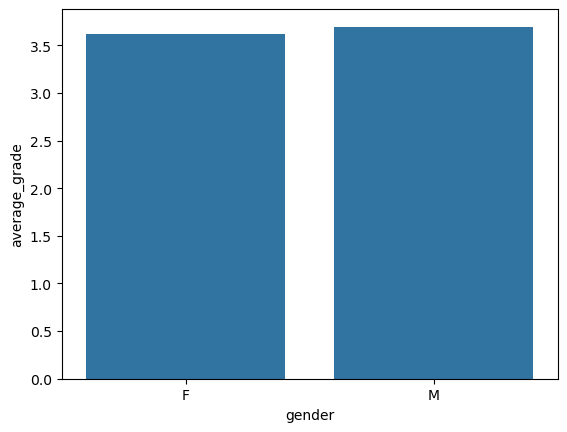

In [89]:
df_gender_filtered = df[df['gender'] != 'other']
gender_average_grade = df_gender_filtered.groupby('gender')['average_grade'].mean().reset_index()
sns.barplot(data=gender_average_grade, x='gender', y='average_grade')
plt.show()

Males (3.7), on average, slightly outperformed females (3.6) with a 0.1 point higher average grade.

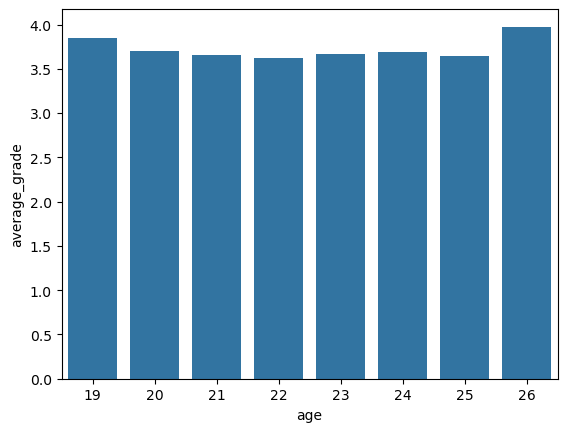

In [90]:
age_average_grade = df.groupby('age')['average_grade'].mean().reset_index()
sns.barplot(data=age_average_grade, x='age', y='average_grade')
plt.show()

26 year old students on average performed the highest across the four subjects.